<a href="https://colab.research.google.com/github/Carlogui/IMEC_4434/blob/main/Upegui_Carlos__LaminateTheory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

<br>

<br>

<font color='black' align="center"><h1> </h1></font>

<font color='black'><h1 align="center">IMEC 4434 - Multi Scale Manufacturing of Composites</h1></font>

<font color='black'><h1 align="center">Professor: Clemens Dransfeld</h1></font>

<font color='black'><h1 align="center">Laminate Theory</h1></font>

<font color='black'><h1 align="center">Carlos Ernesto Upegui - 202213004</h1></font>

<br>

<br>

<font color='black'><center>July 21 2025<br>Summer Course <br>Bogotá DC – Colombia </center><br></font>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<strong><font color='black'><h1><left> Homework</left><h1></strong>


</font>

<strong><font color='black'><u><h1><left>Graphs and Tables:</left><h1></font></strong>

<em><font color='black'><left>Solution:</left></font></em>



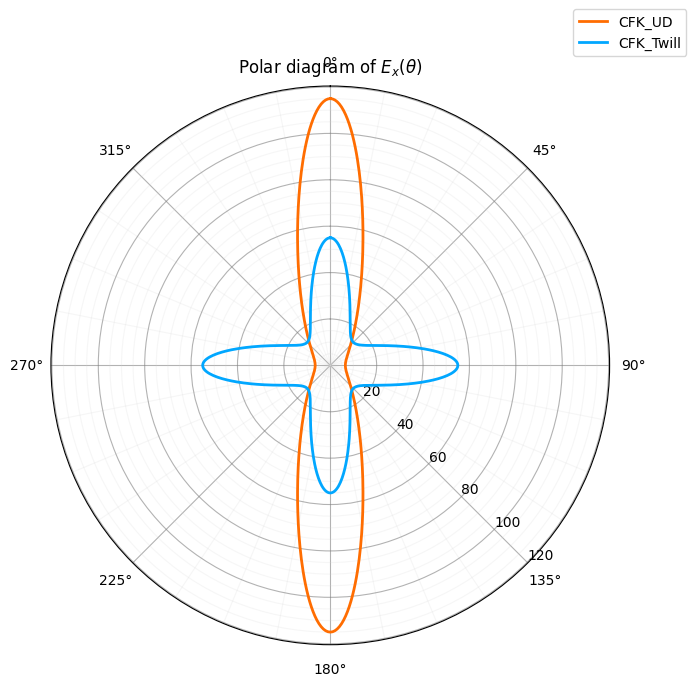

In [ ]:
#Ex(theta) for an orthotropic ply
def Ex_theta(theta_deg, E1, E2, G12, nu12):

    t = np.deg2rad(theta_deg)

    m, s = np.cos(t), np.sin(t)

    S11 = 1.0 / E1

    S22 = 1.0 / E2

    S12 = -nu12 / E1

    S66 = 1.0 / G12

    S11_p = (
        S11 * m ** 4

        + (2.0 * S12 + S66) * m ** 2 * s ** 2

        + S22 * s ** 4
    )
    return 1.0 / S11_p  # MPa


# material data
materials = {
    "CFK_UD": dict(E1=115_000.0, E2=6_500.0, G12=6_000.0, nu12=0.28),

    "CFK_Twill": dict(E1=55_000.0, E2=55_000.0, G12=4_000.0, nu12=0.04),
}

angles = np.array([0, 30, 45, 60, 90])

rows = []

for name, props in materials.items():

    for ang in angles:

        Ex = Ex_theta(ang, **props) / 1_000.0  # to GPa

        rows.append(dict(Material=name, Angle_deg=ang, Ex_GPa=Ex))

df = pd.DataFrame(rows).pivot(index="Angle_deg", columns="Material", values="Ex_GPa").round(2)



# polar plo
theta = np.linspace(0, 360, 721)

fig = plt.figure(figsize=(7, 7))

ax = fig.add_subplot(111, projection="polar")

colors = ["#ff6d01", "#01a7ff"]

for (name, props), c in zip(materials.items(), colors):

    Ex_vals = Ex_theta(theta, **props) / 1_000.0

    ax.plot(np.deg2rad(theta), Ex_vals, label=name, linewidth=2, color=c)


plt.tick_params(direction='out', length=7, width=0.75, grid_alpha=0.6)
plt.grid()
plt.grid(visible=True, which='major', color='grey', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='lightgrey', linestyle='-', alpha=0.2)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_title("Polar diagram of $E_x(\\theta)$", va="bottom")
ax.set_rlabel_position(135)
ax.legend(loc="upper right", bbox_to_anchor=(1.15, 1.15))
plt.tight_layout()
plt.show()
